In [21]:
# Here we are going to find out the best food in the market! Let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os



In [22]:
# Step 1: Let's make a table called ref_value. I have already made it in SQL and imported in my database. The nutritional values were found on the internet.
# Let's import our tables:

database_path = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_path)


query_values = 'SELECT * FROM refvalue'

with engine.connect() as conn:
    df_ref = pd.read_sql_query(query_values, conn)

query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""


with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)


df_food = pd.concat([df_v_fr, df_v_vc, df_v_fd, df_v_vr])
df_food.head()

df_ref.head()

,id,element,ref_value
0,1,vit_a,800
1,2,vit_c,80
2,3,vit_e,12
3,4,mg,375
4,5,zn,10


In [23]:
# Step 2: I need to get information abot every element's reference nutritional value. Let's do some math!
df = pd.DataFrame(columns=["food_name", "food_group", "ref_value", "ref_mg_100g", "ref_zn_100g", "ref_fa_100g", "ref_p_100g", "ref_vitA_100g",
                           "ref_vitC_100g", "ref_vitE_100g", "ref_fiber_100g"])

In [24]:
df_food.head()

,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,fiber_in_g,fiber_in_100kcal,mg_mg_in_100kcal,zn_mg_in_100kcal,fa_mgc_in_100kcal,vitamin_a_in_mcg_100kcal,vitamin_c_in_mcg_100kcal,vitamin_c_in_mg_100kcal,vitamin_e_in_mg_100kcal,p_mg_in_100kcal
0,900,Fruits and Fruit Juices,9003,"Apples, raw, with skin",52.0,5.0,0.04,0.0,11.0,3.0,...,2.4,4.615385,9.615385,0.076923,0,5.769231,8.846154,8.846154,0.346154,21.153846
1,900,Fruits and Fruit Juices,9004,"Apples, raw, without skin",48.0,4.0,0.05,0.0,11.0,2.0,...,1.3,2.708333,8.333333,0.104167,0,4.166667,8.333333,8.333333,0.104167,22.916667
2,900,Fruits and Fruit Juices,9021,"Apricots, raw",48.0,10.0,0.20,0.0,23.0,96.0,...,2.0,4.166667,20.833333,0.416667,0,200.000000,20.833333,20.833333,1.854167,47.916667
3,900,Fruits and Fruit Juices,9037,"Avocados, raw, all commercial varieties",160.0,29.0,0.64,0.0,52.0,7.0,...,6.7,4.187500,18.125000,0.400000,0,4.375000,6.250000,6.250000,1.293750,32.500000
4,900,Fruits and Fruit Juices,9040,"Bananas, raw",89.0,27.0,0.15,0.0,22.0,3.0,...,2.6,2.921348,30.337079,0.168539,0,3.370787,9.775281,9.775281,0.112360,24.719101


In [25]:
# Let's add a column for nutritional referntial value in 100g of product

nutritional_value = df_ref.loc[df_ref['element'] == "mg", 'ref_value'].values[0]
df_food["ref_mg_100g"] = (df_food["mg_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "zn", 'ref_value'].values[0]
df_food["ref_zn_100g"] = (df_food["zn_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100g"] = (df_food["p_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100g"] = (df_food["p_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100g"] = (df_food["fa_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100g"] = (df_food["fa_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_a", 'ref_value'].values[0]
df_food["ref_vitA_100g"] = (df_food["vitamin_a_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_c", 'ref_value'].values[0]
df_food["ref_vitC_100g"] = (df_food["vitamin_c_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_e", 'ref_value'].values[0]
df_food["ref_vitE_100g"] = (df_food["vitamin_e_in_mg"] / nutritional_value).round(4)


df_food.head()





,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,vitamin_c_in_mg_100kcal,vitamin_e_in_mg_100kcal,p_mg_in_100kcal,ref_mg_100g,ref_zn_100g,ref_p_100g,ref_fa_100g,ref_vitA_100g,ref_vitC_100g,ref_vitE_100g
0,900,Fruits and Fruit Juices,9003,"Apples, raw, with skin",52.0,5.0,0.04,0.0,11.0,3.0,...,8.846154,0.346154,21.153846,0.0133,0.004,0.0157,0.0,0.0038,0.0575,0.0150
1,900,Fruits and Fruit Juices,9004,"Apples, raw, without skin",48.0,4.0,0.05,0.0,11.0,2.0,...,8.333333,0.104167,22.916667,0.0107,0.005,0.0157,0.0,0.0025,0.0500,0.0042
2,900,Fruits and Fruit Juices,9021,"Apricots, raw",48.0,10.0,0.20,0.0,23.0,96.0,...,20.833333,1.854167,47.916667,0.0267,0.020,0.0329,0.0,0.1200,0.1250,0.0742
3,900,Fruits and Fruit Juices,9037,"Avocados, raw, all commercial varieties",160.0,29.0,0.64,0.0,52.0,7.0,...,6.250000,1.293750,32.500000,0.0773,0.064,0.0743,0.0,0.0088,0.1250,0.1725
4,900,Fruits and Fruit Juices,9040,"Bananas, raw",89.0,27.0,0.15,0.0,22.0,3.0,...,9.775281,0.112360,24.719101,0.0720,0.015,0.0314,0.0,0.0038,0.1087,0.0083


In [26]:
# Let's add a column for nutritional referntial value in 100kcal of product
nutritional_value = df_ref.loc[df_ref['element'] == "mg", 'ref_value'].values[0]
df_food["ref_mg_100kcal"] = (df_food["mg_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "zn", 'ref_value'].values[0]
df_food["ref_zn_100kcal"] = (df_food["zn_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100kcal"] = (df_food["p_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100kcal"] = (df_food["p_mg_in_100kcal"] / nutritional_value).round(4)


nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100kcal"] = (df_food["fa_mgc_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_a", 'ref_value'].values[0]
df_food["ref_vitA_100kcal"] = (df_food["vitamin_a_in_mcg_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_c", 'ref_value'].values[0]
df_food["ref_vitC_100kcal"] = (df_food["vitamin_c_in_mg_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_e", 'ref_value'].values[0]
df_food["ref_vitE_100kcal"] = (df_food["vitamin_e_in_mg_100kcal"] / nutritional_value).round(4)


df_food.head()


,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,ref_vitA_100g,ref_vitC_100g,ref_vitE_100g,ref_mg_100kcal,ref_zn_100kcal,ref_p_100kcal,ref_fa_100kcal,ref_vitA_100kcal,ref_vitC_100kcal,ref_vitE_100kcal
0,900,Fruits and Fruit Juices,9003,"Apples, raw, with skin",52.0,5.0,0.04,0.0,11.0,3.0,...,0.0038,0.0575,0.0150,0.0256,0.0077,0.0302,0.0,0.0072,0.1106,0.0288
1,900,Fruits and Fruit Juices,9004,"Apples, raw, without skin",48.0,4.0,0.05,0.0,11.0,2.0,...,0.0025,0.0500,0.0042,0.0222,0.0104,0.0327,0.0,0.0052,0.1042,0.0087
2,900,Fruits and Fruit Juices,9021,"Apricots, raw",48.0,10.0,0.20,0.0,23.0,96.0,...,0.1200,0.1250,0.0742,0.0556,0.0417,0.0685,0.0,0.2500,0.2604,0.1545
3,900,Fruits and Fruit Juices,9037,"Avocados, raw, all commercial varieties",160.0,29.0,0.64,0.0,52.0,7.0,...,0.0088,0.1250,0.1725,0.0483,0.0400,0.0464,0.0,0.0055,0.0781,0.1078
4,900,Fruits and Fruit Juices,9040,"Bananas, raw",89.0,27.0,0.15,0.0,22.0,3.0,...,0.0038,0.1087,0.0083,0.0809,0.0169,0.0353,0.0,0.0042,0.1222,0.0094


In [27]:
# Now let's sort out values. Here is top magnesium:
df_mg = df_food[["long_desc", "ref_mg_100g"]].sort_values(by='ref_mg_100g', ascending=False).head(20)
df_mg["g, %"] = df_mg["ref_mg_100g"] * 100
print(df_mg)


                                            long_desc  ref_mg_100g   g, %
54                            Seaweed, irishmoss, raw       0.3840  38.40
55                                 Seaweed, kelp, raw       0.3227  32.27
2               Bananas, dehydrated, or banana powder       0.2880  28.80
76                               Seaweed, wakame, raw       0.2853  28.53
2   Balsam-pear (bitter gourd), leafy tips, cooked...       0.2507  25.07
50                                     Tamarinds, raw       0.2453  24.53
41     Spinach, cooked, boiled, drained, without salt       0.2320  23.20
15  Chard, swiss, cooked, boiled, drained, without...       0.2293  22.93
19                                  Chard, swiss, raw       0.2160  21.60
57                                       Spinach, raw       0.2107  21.07
53                                 Seaweed, agar, raw       0.1787  17.87
23  Jute, potherb, cooked, boiled, drained, withou...       0.1653  16.53
1                  Artichokes, (globe 

In [28]:
# Top zinc:
df_zn = df_food[["long_desc", "ref_zn_100g"]].sort_values(by='ref_zn_100g', ascending=False).head(20)
df_zn["g, %"] = df_zn["ref_zn_100g"] * 100
print(df_zn)


                                            long_desc  ref_zn_100g  g, %
93                                Hearts of palm, raw        0.373  37.3
54                            Seaweed, irishmoss, raw        0.195  19.5
55                                 Seaweed, kelp, raw        0.123  12.3
29                                        Garlic, raw        0.116  11.6
3                                  Bamboo shoots, raw        0.110  11.0
56                                Seaweed, laver, raw        0.105  10.5
0                        Alfalfa seeds, sprouted, raw        0.092   9.2
23  Jute, potherb, cooked, boiled, drained, withou...        0.079   7.9
28                                        Endive, raw        0.079   7.9
3   Balsam-pear (bitter gourd), pods, cooked, boil...        0.077   7.7
6                                  Broccoli raab, raw        0.077   7.7
41     Spinach, cooked, boiled, drained, without salt        0.076   7.6
20                                Chayote, fruit, r

In [29]:
# Top phosphor:
df_p = df_food[["long_desc", "ref_p_100g"]].sort_values(by='ref_p_100g', ascending=False).head(20)
df_p["g, %"] = df_p["ref_p_100g"] * 100
print(df_p)

                                            long_desc  ref_p_100g   g, %
8                                      Litchis, dried      0.2586  25.86
54                            Seaweed, irishmoss, raw      0.2243  22.43
29                                        Garlic, raw      0.2186  21.86
93                                Hearts of palm, raw      0.2000  20.00
5                              Currants, zante, dried      0.1786  17.86
17                                      Celeriac, raw      0.1643  16.43
44                           Raisins, golden seedless      0.1643  16.43
50                                     Tamarinds, raw      0.1614  16.14
45                                  Raisins, seedless      0.1443  14.43
8   Burdock root, cooked, boiled, drained, without...      0.1329  13.29
32                                          Kale, raw      0.1314  13.14
59  Corn, sweet, white, cooked, boiled, drained, w...      0.1314  13.14
1                  Artichokes, (globe or french), r

In [30]:
# Top vitamin A:
df_vitA = df_food[["long_desc", "ref_vitA_100g"]].sort_values(by='ref_vitA_100g', ascending=False).head(20)
df_vitA["g, %"] = df_vitA["ref_vitA_100g"] * 100
print(df_vitA)

                                            long_desc  ref_vitA_100g    g, %
48  Sweet potato, cooked, baked in skin, flesh, wi...         1.2012  120.12
12     Carrots, cooked, boiled, drained, without salt         1.0650  106.50
14                                       Carrots, raw         1.0438  104.38
49         Sweet potato, cooked, boiled, without skin         0.9838   98.38
64                      Sweet potato, raw, unprepared         0.8862   88.62
24        Kale, cooked, boiled, drained, without salt         0.8512   85.12
45  Squash, winter, butternut, cooked, baked, with...         0.6975   69.75
61                     Squash, winter, butternut, raw         0.6650   66.50
41     Spinach, cooked, boiled, drained, without salt         0.6550   65.50
32                                          Kale, raw         0.6250   62.50
57                                       Spinach, raw         0.5863   58.63
36                       Lettuce, cos or romaine, raw         0.5450   54.50

In [31]:
# Top vitamin C:
df_vitC = df_food[["long_desc", "ref_vitC_100g"]].sort_values(by='ref_vitC_100g', ascending=False).head(20)
df_vitC["g, %"] = df_vitC["ref_vitC_100g"] * 100
print(df_vitC)

                                            long_desc  ref_vitC_100g    g, %
77                     Peppers, hot chili, green, raw         3.0312  303.12
21                                Guavas, common, raw         2.8538  285.38
8                                      Litchis, dried         2.2875  228.75
58  Peppers, sweet, red, cooked, boiled, drained, ...         2.1375  213.75
56                     Kiwifruit, ZESPRI SunGold, raw         2.0163  201.63
79                       Peppers, hot chili, red, raw         1.7962  179.62
80                           Peppers, sweet, red, raw         1.5962  159.62
32                                          Kale, raw         1.5000  150.00
90                             Peppers, jalapeno, raw         1.4825  148.25
91                            Peppers, hungarian, raw         1.1613  116.13
23                              Kiwifruit, green, raw         1.1588  115.88
5                                       Broccoli, raw         1.1150  111.50

In [32]:
# Top vitamin E:
df_vitE = df_food[["long_desc", "ref_vitE_100g"]].sort_values(by='ref_vitE_100g', ascending=False).head(20)
df_vitE["g, %"] = df_vitE["ref_vitE_100g"] * 100
print(df_vitE)

                                            long_desc  ref_vitE_100g   g, %
9                             Mango, dried, sweetened         0.3350  33.50
90                             Peppers, jalapeno, raw         0.2983  29.83
50                         Taro, cooked, without salt         0.2442  24.42
6                               Broccoli raab, cooked         0.2108  21.08
17  Chrysanthemum, garland, cooked, boiled, draine...         0.2083  20.83
65                                          Taro, raw         0.1983  19.83
7                       Blueberries, dried, sweetened         0.1958  19.58
22                                      Collards, raw         0.1883  18.83
82                                     Radicchio, raw         0.1883  18.83
4                       Cranberries, dried, sweetened         0.1750  17.50
41     Spinach, cooked, boiled, drained, without salt         0.1733  17.33
3             Avocados, raw, all commercial varieties         0.1725  17.25
57          

In [33]:
# Now let's see how everything changes when we use calories instead of 100 grams.

df_mg_kcal = df_food[["long_desc", "ref_mg_100kcal"]].sort_values(by='ref_mg_100kcal', ascending=False).head(20)
df_mg_kcal["kcal, %"] = df_mg_kcal["ref_mg_100kcal"] * 100
print(df_mg_kcal)


                                            long_desc  ref_mg_100kcal  kcal, %
15  Chard, swiss, cooked, boiled, drained, without...          1.1467   114.67
19                                  Chard, swiss, raw          1.1368   113.68
41     Spinach, cooked, boiled, drained, without salt          1.0087   100.87
57                                       Spinach, raw          0.9159    91.59
86                                       Nopales, raw          0.8667    86.67
60                      Nopales, cooked, without salt          0.8356    83.56
54                            Seaweed, irishmoss, raw          0.7837    78.37
55                                 Seaweed, kelp, raw          0.7504    75.04
2   Balsam-pear (bitter gourd), leafy tips, cooked...          0.7373    73.73
53                                 Seaweed, agar, raw          0.6872    68.72
76                               Seaweed, wakame, raw          0.6341    63.41
70                                    Watercress, ra

In [34]:
# zinc
df_zn_kcal = df_food[["long_desc", "ref_zn_100kcal"]].sort_values(by='ref_zn_100kcal', ascending=False).head(20)
df_zn_kcal["kcal, %"] = df_zn_kcal["ref_zn_100kcal"] * 100
print(df_zn_kcal)

                                            long_desc  ref_zn_100kcal  kcal, %
28                                        Endive, raw          0.4647    46.47
53  Waxgourd, (chinese preserving melon), cooked, ...          0.4214    42.14
3                                  Bamboo shoots, raw          0.4074    40.74
3   Balsam-pear (bitter gourd), pods, cooked, boil...          0.4053    40.53
0                        Alfalfa seeds, sprouted, raw          0.4000    40.00
54                            Seaweed, irishmoss, raw          0.3980    39.80
20                                Chayote, fruit, raw          0.3895    38.95
22   Escarole, cooked, boiled, drained, no salt added          0.3632    36.32
6                                  Broccoli raab, raw          0.3500    35.00
41     Spinach, cooked, boiled, drained, without salt          0.3304    33.04
93                                Hearts of palm, raw          0.3243    32.43
56                                Seaweed, laver, ra

In [35]:
# phosphor
df_p_kcal = df_food[["long_desc", "ref_p_100kcal"]].sort_values(by='ref_p_100kcal', ascending=False).head(20)
df_p_kcal["kcal, %"] = df_p_kcal["ref_p_100kcal"] * 100
print(df_p_kcal)

                                            long_desc  ref_p_100kcal  kcal, %
70                                    Watercress, raw         0.7792    77.92
6                                  Broccoli raab, raw         0.4740    47.40
54                            Seaweed, irishmoss, raw         0.4577    45.77
0                        Alfalfa seeds, sprouted, raw         0.4348    43.48
12                   Cabbage, chinese (pak-choi), raw         0.4066    40.66
17                                      Celeriac, raw         0.3912    39.12
2                                      Asparagus, raw         0.3714    37.14
35  Lettuce, butterhead (includes boston and bibb ...         0.3626    36.26
6                               Broccoli raab, cooked         0.3550    35.50
44  Squash, summer, zucchini, includes skin, cooke...         0.3524    35.24
1                  Asparagus, cooked, boiled, drained         0.3506    35.06
41     Spinach, cooked, boiled, drained, without salt         0.

In [36]:
# vitamin A
df_vitA_kcal = df_food[["long_desc", "ref_vitA_100kcal"]].sort_values(by='ref_vitA_100kcal', ascending=False).head(20)
df_vitA_kcal["kcal, %"] = df_vitA_kcal["ref_vitA_100kcal"] * 100
print(df_vitA_kcal)

                                            long_desc  ref_vitA_100kcal  \
36                       Lettuce, cos or romaine, raw            3.2059   
38                           Lettuce, green leaf, raw            3.0833   
12     Carrots, cooked, boiled, drained, without salt            3.0429   
24        Kale, cooked, boiled, drained, without salt            3.0402   
39                             Lettuce, red leaf, raw            2.9297   
41     Spinach, cooked, boiled, drained, without salt            2.8478   
33  Pokeberry shoots, (poke), cooked, boiled, drai...            2.7188   
57                                       Spinach, raw            2.5489   
14                                       Carrots, raw            2.5457   
11  Cabbage, chinese (pak-choi), cooked, boiled, d...            2.2083   
12                   Cabbage, chinese (pak-choi), raw            2.1442   
49                                       Pumpkin, raw            2.0481   
19                       

In [37]:
# vitamin C
df_vitC_kcal = df_food[["long_desc", "ref_vitC_100kcal"]].sort_values(by='ref_vitC_100kcal', ascending=False).head(20)
df_vitC_kcal["kcal, %"] = df_vitC_kcal["ref_vitC_100kcal"] * 100
print(df_vitC_kcal)

                                            long_desc  ref_vitC_100kcal  \
58  Peppers, sweet, red, cooked, boiled, drained, ...            7.6339   
77                     Peppers, hot chili, green, raw            7.5781   
80                           Peppers, sweet, red, raw            5.1492   
33  Pokeberry shoots, (poke), cooked, boiled, drai...            5.1250   
90                             Peppers, jalapeno, raw            5.1121   
44                         Peppers, sweet, green, raw            5.0250   
70                                    Watercress, raw            4.8864   
79                       Peppers, hot chili, red, raw            4.4906   
12                   Cabbage, chinese (pak-choi), raw            4.3269   
21                                Guavas, common, raw            4.1967   
91                            Peppers, hungarian, raw            4.0043   
88                                Pepper, banana, raw            3.8287   
87                       

In [38]:
# vitamin E
df_vitE_kcal = df_food[["long_desc", "ref_vitE_100kcal"]].sort_values(by='ref_vitE_100kcal', ascending=False).head(20)
df_vitE_kcal["kcal, %"] = df_vitE_kcal["ref_vitE_100kcal"] * 100
print(df_vitE_kcal)

                                            long_desc  ref_vitE_100kcal  \
17  Chrysanthemum, garland, cooked, boiled, draine...            1.0417   
90                             Peppers, jalapeno, raw            1.0287   
19                                  Chard, swiss, raw            0.8289   
82                                     Radicchio, raw            0.8188   
15  Chard, swiss, cooked, boiled, drained, without...            0.7875   
70                                    Watercress, raw            0.7576   
41     Spinach, cooked, boiled, drained, without salt            0.7536   
57                                       Spinach, raw            0.7355   
6                               Broccoli raab, cooked            0.6389   
6                                  Broccoli raab, raw            0.6136   
22                                      Collards, raw            0.5885   
1                  Asparagus, cooked, boiled, drained            0.5682   
58  Peppers, sweet, red, 

In [39]:
# Now we have all the relevant information, lets calculate best food ever!
kcal_columns = ["ref_mg_100kcal", "ref_zn_100kcal", "ref_fa_100kcal", "ref_p_100kcal", "ref_vitA_100kcal", 
                "ref_vitC_100kcal", "ref_vitE_100kcal"]
def filter_values(value):
    return min(value, 1)

# Apply the custom function to the specified columns
df_food[kcal_columns] = df_food[kcal_columns].applymap(filter_values)

# Display the updated DataFrame

df_food["all_100kcal"] = df_food[kcal_columns].sum(axis=1)
df_food[["long_desc", "all_100kcal"]].sort_values(by='all_100kcal', ascending=False).head(20)

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_20624\1975749043.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_food[kcal_columns] = df_food[kcal_columns].applymap(filter_values)


,long_desc,all_100kcal
19,"Chard, swiss, raw",4.3643
15,"Chard, swiss, cooked, boiled, drained, without...",4.1882
57,"Spinach, raw",4.1861
70,"Watercress, raw",4.1459
41,"Spinach, cooked, boiled, drained, without salt",3.9644
17,"Chrysanthemum, garland, cooked, boiled, draine...",3.4533
6,"Broccoli raab, raw",3.4486
6,"Broccoli raab, cooked",3.2355
12,"Cabbage, chinese (pak-choi), raw",3.0002
22,"Collards, raw",2.9712


In [40]:
# Now we have all the relevant information, lets calculate best food ever! in 100 grams
g_columns = ["ref_mg_100g", "ref_zn_100g", "ref_fa_100g", "ref_p_100g", "ref_vitA_100g", 
                "ref_vitC_100g", "ref_vitE_100g"]
def filter_values(value):
    return min(value, 1)

# Apply the custom function to the specified columns
df_food[g_columns] = df_food[g_columns].applymap(filter_values)

# Display the updated DataFrame

df_food["all_100g"] = df_food[g_columns].sum(axis=1)
df_food[["long_desc", "all_100g"]].sort_values(by='all_100g', ascending=False).head(20)

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_20624\3556731620.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_food[g_columns] = df_food[g_columns].applymap(filter_values)


,long_desc,all_100g
32,"Kale, raw",2.0660
33,"Pokeberry shoots, (poke), cooked, boiled, drai...",1.7180
24,"Cress, garden, raw",1.5862
24,"Kale, cooked, boiled, drained, without salt",1.5465
48,"Sweet potato, cooked, baked in skin, flesh, wi...",1.4853
90,"Peppers, jalapeno, raw",1.4569
57,"Spinach, raw",1.4404
8,"Litchis, dried",1.4244
80,"Peppers, sweet, red, raw",1.4220
58,"Peppers, sweet, red, cooked, boiled, drained, ...",1.3857


In [41]:


df_food.head()

,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,ref_vitE_100g,ref_mg_100kcal,ref_zn_100kcal,ref_p_100kcal,ref_fa_100kcal,ref_vitA_100kcal,ref_vitC_100kcal,ref_vitE_100kcal,all_100kcal,all_100g
0,900,Fruits and Fruit Juices,9003,"Apples, raw, with skin",52.0,5.0,0.04,0.0,11.0,3.0,...,0.0150,0.0256,0.0077,0.0302,0.0,0.0072,0.1106,0.0288,0.2101,0.1093
1,900,Fruits and Fruit Juices,9004,"Apples, raw, without skin",48.0,4.0,0.05,0.0,11.0,2.0,...,0.0042,0.0222,0.0104,0.0327,0.0,0.0052,0.1042,0.0087,0.1834,0.0881
2,900,Fruits and Fruit Juices,9021,"Apricots, raw",48.0,10.0,0.20,0.0,23.0,96.0,...,0.0742,0.0556,0.0417,0.0685,0.0,0.2500,0.2604,0.1545,0.8307,0.3988
3,900,Fruits and Fruit Juices,9037,"Avocados, raw, all commercial varieties",160.0,29.0,0.64,0.0,52.0,7.0,...,0.1725,0.0483,0.0400,0.0464,0.0,0.0055,0.0781,0.1078,0.3261,0.5219
4,900,Fruits and Fruit Juices,9040,"Bananas, raw",89.0,27.0,0.15,0.0,22.0,3.0,...,0.0083,0.0809,0.0169,0.0353,0.0,0.0042,0.1222,0.0094,0.2689,0.2392


<Figure size 600x300 with 0 Axes>

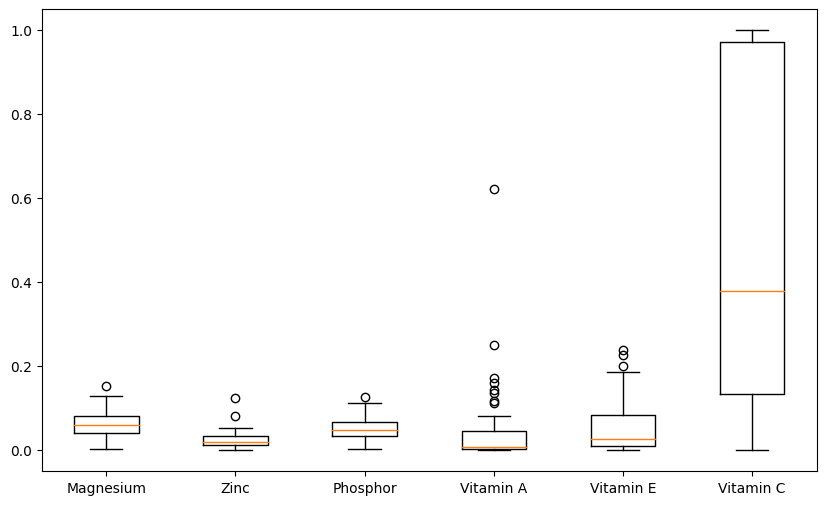

In [42]:
# Nutritional value of raw fruits in 100kcal

df_fr_join = pd.merge(df_v_fr, df_food, on='id', how='left')
data = df_fr_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

<Figure size 600x300 with 0 Axes>

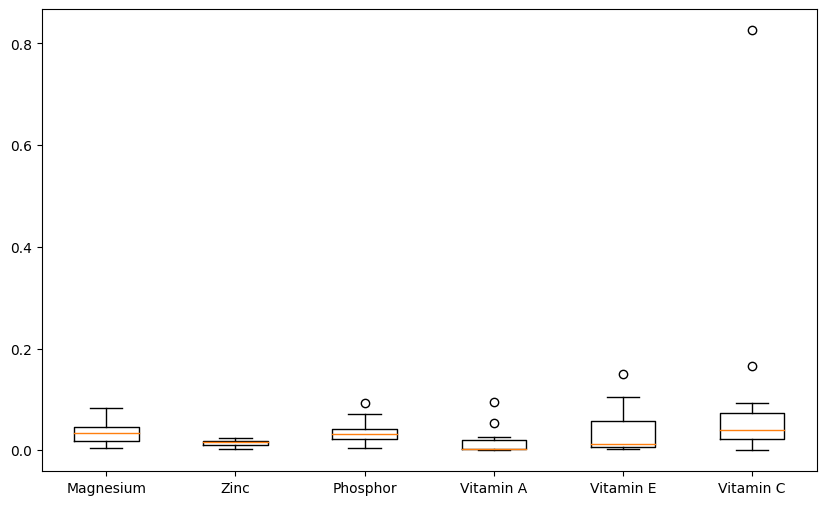

In [43]:
# Nutritional value of dried fruits in 100kcal

df_fd_join = pd.merge(df_v_fd, df_food, on='id', how='left')
data = df_fd_join[['ref_mg_100kcal', 'ref_zn_100kcal',  'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

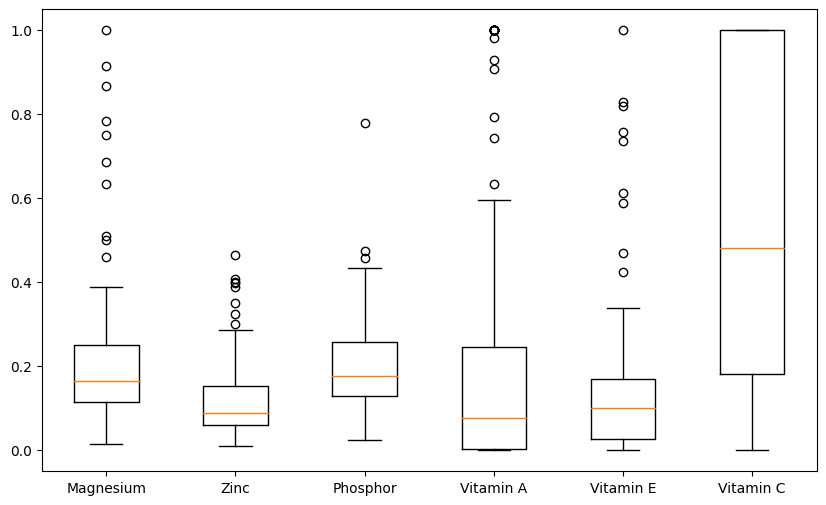

In [44]:
# Nutritional value of raw vegetables in 100kcal

df_vr_join = pd.merge(df_v_vr, df_food, on='id', how='left')
data = df_vr_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]


labels_raw = ['Magnesium', 'Zinc', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data, labels=labels_raw)

plt.show()

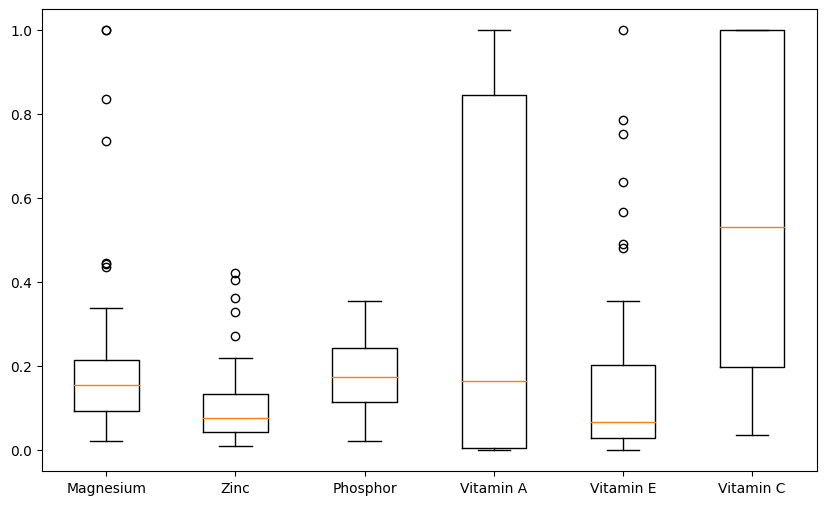

In [45]:
# Nutritional value of cooked vegetables in 100kcal

df_vc_join = pd.merge(df_v_vc, df_food, on='id', how='left')
data_vc = df_vc_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]


labels_cooked = ['Magnesium', 'Zinc', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_vc, labels=labels_cooked)

plt.show()